In [1]:

import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, precision_recall_curve

In [2]:

train_data = pd.read_csv('FinalTrain31Aug.csv')
test_data = pd.read_csv('FinalTest31Aug.csv')

In [3]:
testId = pd.read_csv('testTransId.csv', header=None)

In [4]:
testId.head()[0]

0    TransactionId_50600
1    TransactionId_95109
2    TransactionId_47357
3    TransactionId_28185
4    TransactionId_22140
Name: 0, dtype: object

In [5]:
X, y = train_data.drop('FraudResult', axis=1), train_data['FraudResult']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [6]:
X_train.shape

(76529, 191)

In [7]:
X_test.shape

(19133, 191)

In [8]:
from sklearn.utils import resample

In [9]:
from sklearn.model_selection import TimeSeriesSplit

cv = StratifiedKFold(n_splits=5, random_state=42)
tss = TimeSeriesSplit(n_splits=5)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import RFE

In [12]:
from sklearn.feature_selection import SelectFromModel

In [13]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import Pipeline

In [ ]:
xgbm = xgb.XGBClassifier(n_estimators=100, max_depth=3, scale_pos_weight=496, n_jobs=-1, random_state=42)


In [ ]:
cross_val_score(xgbm, X_train, y_train, cv=TimeSeriesSplit(n_splits=20), scoring='f1', n_jobs=-1).mean()

In [ ]:
cross_val_score(xgbm, X, y, cv=TimeSeriesSplit(n_splits=20), scoring='f1', n_jobs=-1).mean()

In [ ]:
cross_val_score(xgbm, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1).mean()

In [ ]:
cross_val_score(xgbm, X, y, cv=cv, scoring='f1', n_jobs=-1).mean()

In [ ]:
cross_val_score(xgbm, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1).mean()

In [ ]:
Counter(y_test)

<h2>XGBoost</h2>

In [ ]:
print(grid.best_params_, grid.best_score_)

In [14]:
##Classifier
xgbm=xgb.XGBClassifier(max_depth=6,
                 learning_rate=0.1,
                 n_estimators=100,
                 objective="binary:logistic",
                 booster="gbtree",
                 gamma=0.4,
                 min_child_weight=3,
                 subsample=0.9,
                 colsample_bylevel=1,
                 colsample_bytree=0.6,
                 reg_alpha=0.001,
                 reg_lambda=1,
                 scale_pos_weight=496,
                 random_state=42,
                 n_jobs=-1)

#cross_val_score(xgbm, X_train, y_train, cv=TimeSeriesSplit(n_splits=5), scoring='f1', n_jobs=-1).mean()

In [15]:
params_1 = {
    'reg_lambda' : [0.5, 1],
    'reg_alpha':[0, 0.001]
}

grid1 = GridSearchCV(
    xgbm, params_1, scoring='f1', n_jobs=-1, refit=True, verbose=0, cv=TimeSeriesSplit(n_splits=5)
)

grid1.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0.001, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.9, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'reg_lambda': [0.5, 1], 'reg_alpha': [0, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [16]:
grid1.best_params_, grid1.best_score_

({'reg_alpha': 0, 'reg_lambda': 1}, 0.8175856497980517)

In [17]:
grid1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.9, verbosity=1)

In [18]:
xgb_ft_importances = grid1.best_estimator_.feature_importances_
fts = X_train.columns

xgb_importances = pd.DataFrame({'Features' : fts, 'Importances' : xgb_ft_importances}).sort_values(by='Importances', ascending=False)
xgb_importances.head()

,Features,Importances
60,sum_of_amt_per_ProductId_in_last_24hhrs,0.289322
7,Avg_amt_per_ProviderId_in_last_12hhrs,0.184162
8,sum_of_amt_per_ProviderId_in_last_12hhrs,0.182772
56,sum_of_amt_per_ProductId_in_last_12hhrs,0.054327
117,Amount_to_mean_ChannelId,0.052674


In [19]:
xgbm_ft_importances_stored = xgb_importances['Importances'].tolist()
xgbm_ft_importances_stored

[0.2893218398094177,
 0.1841624230146408,
 0.1827717423439026,
 0.05432732030749321,
 0.052674125880002975,
 0.04821249097585678,
 0.020868195220828056,
 0.01963481865823269,
 0.01351742260158062,
 0.013077921234071255,
 0.012020773254334927,
 0.008020779117941856,
 0.0070663318037986755,
 0.006876960396766663,
 0.00585645018145442,
 0.0054880063980817795,
 0.0049582296051084995,
 0.004576418548822403,
 0.003903270000591874,
 0.003853564616292715,
 0.003806590335443616,
 0.002897702855989337,
 0.002529678400605917,
 0.0025111555587500334,
 0.002490087179467082,
 0.0024619053583592176,
 0.0023622747976332903,
 0.0019146207487210631,
 0.0016386231873184443,
 0.0015961930621415377,
 0.001581875723786652,
 0.001504231127910316,
 0.0014999302802607417,
 0.001409644610248506,
 0.001276718219742179,
 0.0012129672104492784,
 0.0012052025413140655,
 0.0011563051957637072,
 0.0011450937017798424,
 0.0010847090743482113,
 0.001041193027049303,
 0.0008645575144328177,
 0.0008620956214144826,
 0.00

In [20]:
xgb_importances[xgb_importances['Importances']==0].shape

(67, 2)

In [21]:
xgb_importances = xgb_importances[xgb_importances['Importances']>0]
xgb_importances.shape

(124, 2)

In [22]:
xgb.XGBClassifier(**grid1.best_estimator_.get_params())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.9, verbosity=1)

In [23]:
X_train.shape

(76529, 191)

In [24]:
X_test.shape

(19133, 191)

In [25]:
grid1 = grid1.best_estimator_

In [ ]:
thresholds = np.sort(np.array(xgb_importances['Importances']))
for thresh in thresholds:
    
    f1 = []
    
    for train, test in TimeSeriesSplit(n_splits=5).split(X_train, y_train):
        # select features using threshold
        selection = SelectFromModel(grid1, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train.iloc[train])
        # train model
        selection_model = xgb.XGBClassifier(**grid1.get_params())
        selection_model.fit(select_X_train, y_train.iloc[train])
        # eval model
        select_X_test = selection.transform(X_train.iloc[test])
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        f1.append(f1_score(y_train.iloc[test], predictions))
        
    print("Thresh=%.8f, n=%d, F1: %.8f" % (thresh, select_X_train.shape[1], np.mean(f1)))

In [26]:


xgb_importances[xgb_importances['Importances']>=0.00017532]['Features'].shape

(77,)

In [27]:
xgb_selected_features = xgb_importances[xgb_importances['Importances']>=0.00017532]['Features']

X_train_xgb = X_train.loc[:, xgb_selected_features]
X_test_xgb = X_test.loc[:, xgb_selected_features]

test_data_xgb = test_data.loc[:, xgb_selected_features]

In [28]:
X_train_xgb.head()

,sum_of_amt_per_ProductId_in_last_24hhrs,Avg_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProductId_in_last_12hhrs,Amount_to_mean_ChannelId,max_amt_per_ProductId_in_last_12hhrs,max_amt_per_ProductId_in_last_24hhrs,Avg_amt_per_PricingStrategy_in_last_72hhrs,max_amt_per_ProductCategory_in_last_72hhrs,sum_of_amt_per_ProviderId_in_last_168hhrs,...,no_of_trans_per_ProductId_in_last_12hhrs,max_amt_per_ProductId_in_last_168hhrs,sum_of_amt_per_ChannelId_in_last_168hhrs,no_of_trans_per_ChannelId_in_last_168hhrs,Amount,Weekday_Wednesday,Amount_to_mean_ProductId,Avg_amt_per_CustomerId_in_last_12hhrs,no_of_trans_per_ProductId_in_last_72hhrs,Avg_amt_per_ProviderId_in_last_168hhrs
46767,40500.0,10125.000000,40500.0,40500.0,0.660896,19500.0,19500.0,2111.058140,46000.0,153000.0,...,4.0,46000.0,502600.0,189.0,9000.0,0,0.198767,2750.294118,6.0,19125.0
6158,28000.0,14000.000000,28000.0,28000.0,1.101493,15000.0,15000.0,9634.333333,15000.0,54000.0,...,2.0,15000.0,153500.0,13.0,15000.0,0,1.226831,14214.000000,2.0,9000.0
80336,-5000.0,-5000.000000,-5000.0,-5000.0,1.282048,-5000.0,-5000.0,-5000.000000,-5000.0,-5000.0,...,1.0,-5000.0,-5000.0,1.0,-5000.0,0,5.533930,2500.000000,1.0,-5000.0
22537,4200.0,200.000000,200.0,200.0,0.014687,200.0,4000.0,2050.000000,4000.0,9200.0,...,1.0,4000.0,9640.0,6.0,200.0,0,0.055415,200.000000,4.0,1840.0
86131,8000.0,1532.923077,19928.0,8000.0,0.146866,2000.0,2000.0,7003.186441,5000.0,67428.0,...,6.0,5000.0,685728.0,48.0,2000.0,0,-7.253432,3289.428571,23.0,1873.0


In [29]:
grid1.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 3,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 496,
 'seed': None,
 'silent': None,
 'subsample': 0.9,
 'verbosity': 1}

In [30]:
xgb_selected_features

60             sum_of_amt_per_ProductId_in_last_24hhrs
7                Avg_amt_per_ProviderId_in_last_12hhrs
8             sum_of_amt_per_ProviderId_in_last_12hhrs
56             sum_of_amt_per_ProductId_in_last_12hhrs
117                           Amount_to_mean_ChannelId
57                max_amt_per_ProductId_in_last_12hhrs
61                max_amt_per_ProductId_in_last_24hhrs
79          Avg_amt_per_PricingStrategy_in_last_72hhrs
33          max_amt_per_ProductCategory_in_last_72hhrs
20           sum_of_amt_per_ProviderId_in_last_168hhrs
65                max_amt_per_ProductId_in_last_72hhrs
28       sum_of_amt_per_ProductCategory_in_last_24hhrs
32       sum_of_amt_per_ProductCategory_in_last_72hhrs
12            sum_of_amt_per_ProviderId_in_last_24hhrs
48             sum_of_amt_per_ChannelId_in_last_72hhrs
80       sum_of_amt_per_PricingStrategy_in_last_72hhrs
81          max_amt_per_PricingStrategy_in_last_72hhrs
95               Avg_amt_per_CustomerId_in_last_72hhrs
184       

In [ ]:
def my_metric(y_true, pred):
    return f1_score(np.array(y_true), np.array(pred))

In [31]:
xgbm = xgb.XGBClassifier(
    n_estimators=7000, learning_rate=0.024, max_depth=6, min_child_weight=3,
    gamma = 0.4, subsample=0.9, colsample_bytree=0.6, n_jobs=-1, scale_pos_weight=496,
    random_state=42, reg_alpha=0, reg_lambda=1
)

xgbm.fit(X_train_xgb, y_train, eval_set=[(X_test_xgb, y_test)], early_stopping_rounds=60)

[0]	validation_0-error:0.00324
Will train until validation_0-error hasn't improved in 60 rounds.
[1]	validation_0-error:0.003293
[2]	validation_0-error:0.004234
[3]	validation_0-error:0.004077
[4]	validation_0-error:0.003868
[5]	validation_0-error:0.003659
[6]	validation_0-error:0.003763
[7]	validation_0-error:0.003502
[8]	validation_0-error:0.003763
[9]	validation_0-error:0.003763
[10]	validation_0-error:0.003554
[11]	validation_0-error:0.003554
[12]	validation_0-error:0.003659
[13]	validation_0-error:0.003659
[14]	validation_0-error:0.003606
[15]	validation_0-error:0.00324
[16]	validation_0-error:0.003293
[17]	validation_0-error:0.003293
[18]	validation_0-error:0.003293
[19]	validation_0-error:0.003188
[20]	validation_0-error:0.003188
[21]	validation_0-error:0.003188
[22]	validation_0-error:0.003188
[23]	validation_0-error:0.003188
[24]	validation_0-error:0.002979
[25]	validation_0-error:0.003136
[26]	validation_0-error:0.002927
[27]	validation_0-error:0.003136
[28]	validation_0-erro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
       learning_rate=0.024, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=7000, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.9, verbosity=1)

In [ ]:
train_predictions = xgbm.predict(X_train_xgb)
test_predictions = xgbm.predict(X_test_xgb)

print('Train Score: {:4f}'.format(f1_score(y_train, train_predictions)))
print('Test Score: {:4f}'.format(f1_score(y_test, test_predictions)))

In [ ]:
Counter(xgbm.predict(X_test_xgb))

In [ ]:
Counter(xgbm.predict(test_data_xgb))

In [ ]:
confusion_matrix(y_test, xgbm.predict(X_test_xgb))

In [ ]:
#xgbm

In [ ]:
#----------------------------------final solution for xgboost--------------------------------

final_xgboost_predictions = xgbm.predict(test_data_xgb)


xgb_final_submission = pd.DataFrame(
    {'TransactionId' : testId[0], 'FraudResult' : final_xgboost_predictions}
)

xgb_final_submission.to_csv('xgb_final_submission.csv', index=False)

In [ ]:
#thresholding

p_sl = xgbm.predict_proba(X_test_xgb)
precision, recall, thresholds = precision_recall_curve(y_test, p_sl[:,1])
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

In [ ]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())

thresh = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

scrs.plot(x='thresholds', y='f1_score')

In [ ]:
frame =  scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]
frame

In [ ]:
xgboost_thresh = frame['thresholds'].values[0]
xgboost_thresh

In [ ]:
xgboost_thresh_pred_Xtest = [1 if y>=xgboost_thresh else 0 for y in p_sl[:, 1]]

f1_score(y_test, xgboost_thresh_pred_Xtest)

In [ ]:
Counter(xgboost_thresh_pred_Xtest)

In [ ]:
Counter([1 if y>=xgboost_thresh else 0 for y in xgbm.predict_proba(test_data_xgb)[:, 1]])

In [ ]:
#--------------------------final thresholding solution for xgboost--------------------------------

final_thresh_xgboost_predictions = [1 if y>=xgboost_thresh else 0 for y in xgbm.predict_proba(test_data_xgb)[:, 1]]


xgb_final_thresh_submission = pd.DataFrame(
    {'TransactionId' : testId[0], 'FraudResult' : final_thresh_xgboost_predictions}
)

xgb_final_thresh_submission.to_csv('xgb_final_thresh_submission.csv', index=False)

<h3>Drifting</h3>

In [26]:
training = train_data.copy()
testing = test_data.copy()

training['origin'] = 1
testing['origin'] = 0

training.drop('FraudResult', axis=1, inplace=True)

training = training.sample(30000, random_state=42)
testing = testing.sample(15000, random_state=112)

combined = pd.concat([training, testing], axis=0)
y = combined['origin']
X = combined.drop('origin', axis=1)

drift_list = []

model = xgb.XGBClassifier(
    max_depth=4, scale_pos_weight=496, subsample=0.78, colsample_bytree=0.78,
    n_jobs=-1, random_state=42
)

for i in X.columns:
    score = cross_val_score(model, pd.DataFrame(X[i]), y, cv=2, scoring='roc_auc').mean()
    
    if score>0.8:
        drift_list.append(i)
        print(i, score)

No. Customers per Acc 0.8951825955555555
Amount_to_mean_ProviderId 0.9671518755555556
Amount_to_std_ProviderId 0.9644883244444444
Amount_to_mean_PricingStrategy 0.96520282
Amount_to_std_PricingStrategy 0.9635849244444445
Amount_to_mean_ProductCategory 0.9590371733333334
Amount_to_std_ProductCategory 0.9583965688888889
Amount_to_mean_ChannelId 0.9807042866666666
Amount_to_std_ChannelId 0.9761273266666667
Amount_to_mean_ProductId 0.9644807577777779
Amount_to_std_ProductId 0.945837528888889


In [27]:
xgb_drift_list = drift_list
xgb_drift_list

['No. Customers per Acc',
 'Amount_to_mean_ProviderId',
 'Amount_to_std_ProviderId',
 'Amount_to_mean_PricingStrategy',
 'Amount_to_std_PricingStrategy',
 'Amount_to_mean_ProductCategory',
 'Amount_to_std_ProductCategory',
 'Amount_to_mean_ChannelId',
 'Amount_to_std_ChannelId',
 'Amount_to_mean_ProductId',
 'Amount_to_std_ProductId']

In [28]:
xgb_drift_train = X_train.drop(xgb_drift_list, axis=1)
xgb_drift_test = X_test.drop(xgb_drift_list, axis=1)

In [29]:
test_xgb_drift = test_data.drop(xgb_drift_list, axis=1)

In [30]:
xgb_drift_train.head()

,Amount,PricingStrategy,ExtraCharges,Days_to_Nearest_Holiday,Prev_Amt,Time_since_last_trans,Avg_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProviderId_in_last_12hhrs,max_amt_per_ProviderId_in_last_12hhrs,no_of_trans_per_ProviderId_in_last_12hhrs,...,Multiple_Sub_by_Customer_Yes,Multiple_Sub_by_Acc_Yes,Week_first_week,Week_fourth_week,Week_second_week,Week_third_week,Within_CI95_7days_Yes,Within_CI95_14days_Yes,Within_CI95_21days_Yes,Within_CI95_28days_Yes
46767,9000.0,3,0.0,2,9000.0,1.200000,10125.000000,40500.0,19500.0,4.0,...,1,0,0,0,0,0,0,0,0,0
6158,15000.0,3,1650.0,32,-644.0,3.650000,14000.000000,28000.0,15000.0,2.0,...,1,0,0,1,0,0,0,0,0,0
80336,-5000.0,3,0.0,15,10000.0,2.450000,-5000.000000,-5000.0,-5000.0,1.0,...,1,1,1,0,0,0,1,0,0,1
22537,200.0,4,0.0,15,-200.0,1320.716667,200.000000,200.0,200.0,1.0,...,1,0,0,0,1,0,0,0,0,0
86131,2000.0,3,0.0,11,-50.0,55.900000,1532.923077,19928.0,2688.0,13.0,...,1,0,1,0,0,0,0,0,0,0


In [31]:
xgb_importances.set_index('Features').shape

(124, 1)

In [32]:
grid1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.9, verbosity=1)

In [33]:
grid1.fit(xgb_drift_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.9, verbosity=1)

In [ ]:
thresholds = np.sort(np.array(xgb_importances.set_index('Features').drop(labels=xgb_drift_list, axis=0)['Importances']))
for thresh in thresholds:
    
    f1 = []
    
    for train, test in TimeSeriesSplit(n_splits=5).split(xgb_drift_train, y_train):
        # select features using threshold
        selection = SelectFromModel(grid1, threshold=thresh, prefit=True)
        select_X_train = selection.transform(xgb_drift_train.iloc[train])
        # train model
        selection_model = xgb.XGBClassifier(**grid1.get_params())
        selection_model.fit(select_X_train, y_train.iloc[train])
        # eval model
        select_X_test = selection.transform(xgb_drift_train.iloc[test])
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        f1.append(f1_score(y_train.iloc[test], predictions))
        
    print("Thresh=%.8f, n=%d, F1: %.8f" % (thresh, select_X_train.shape[1], np.mean(f1)))

Thresh=0.00001384, n=118, F1: 0.79466689
Thresh=0.00001391, n=118, F1: 0.79466689
Thresh=0.00001999, n=116, F1: 0.79329481
Thresh=0.00002198, n=115, F1: 0.78289000
Thresh=0.00002295, n=115, F1: 0.78289000
Thresh=0.00002424, n=115, F1: 0.78289000
Thresh=0.00002515, n=115, F1: 0.78289000


In [34]:
kkk = xgb_importances.set_index('Features').drop(labels=xgb_drift_list, axis=0)

xgb_drift_selected_features = kkk[kkk['Importances']>=0.00045927].index

X_train_xgb_drift = xgb_drift_train.loc[:, xgb_drift_selected_features]
X_test_xgb_drift = xgb_drift_test.loc[:, xgb_drift_selected_features]

test_data_xgb_drift = test_xgb_drift.loc[:, xgb_drift_selected_features]

In [39]:
xgbm_drift = xgb.XGBClassifier(
    n_estimators=7000, learning_rate=0.024, max_depth=6, min_child_weight=3,
    gamma = 0.4, subsample=0.9, colsample_bytree=0.6, n_jobs=-1, scale_pos_weight=496,
    random_state=42, reg_alpha=0, reg_lambda=1
)

xgbm_drift.fit(X_train_xgb_drift, y_train, eval_set=[(X_test_xgb_drift, y_test)], early_stopping_rounds=100)

[0]	validation_0-error:0.002822
Will train until validation_0-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.002822
[2]	validation_0-error:0.003606
[3]	validation_0-error:0.003763
[4]	validation_0-error:0.003763
[5]	validation_0-error:0.003659
[6]	validation_0-error:0.003659
[7]	validation_0-error:0.003606
[8]	validation_0-error:0.003606
[9]	validation_0-error:0.003606
[10]	validation_0-error:0.003606
[11]	validation_0-error:0.003606
[12]	validation_0-error:0.003606
[13]	validation_0-error:0.003554
[14]	validation_0-error:0.003606
[15]	validation_0-error:0.003606
[16]	validation_0-error:0.003606
[17]	validation_0-error:0.003554
[18]	validation_0-error:0.003606
[19]	validation_0-error:0.003606
[20]	validation_0-error:0.003606
[21]	validation_0-error:0.003659
[22]	validation_0-error:0.003711
[23]	validation_0-error:0.003711
[24]	validation_0-error:0.003763
[25]	validation_0-error:0.003659
[26]	validation_0-error:0.003659
[27]	validation_0-error:0.003659
[28]	validation_0-e

[243]	validation_0-error:0.001254
[244]	validation_0-error:0.001254
[245]	validation_0-error:0.001254
[246]	validation_0-error:0.001254
[247]	validation_0-error:0.001254
[248]	validation_0-error:0.001307
[249]	validation_0-error:0.001307
[250]	validation_0-error:0.001307
[251]	validation_0-error:0.001307
[252]	validation_0-error:0.001307
[253]	validation_0-error:0.001307
[254]	validation_0-error:0.001307
[255]	validation_0-error:0.001307
[256]	validation_0-error:0.001307
[257]	validation_0-error:0.001307
[258]	validation_0-error:0.001307
[259]	validation_0-error:0.001307
[260]	validation_0-error:0.001307
[261]	validation_0-error:0.001307
[262]	validation_0-error:0.001307
[263]	validation_0-error:0.001307
[264]	validation_0-error:0.001307
[265]	validation_0-error:0.001307
[266]	validation_0-error:0.001307
[267]	validation_0-error:0.001307
[268]	validation_0-error:0.001307
[269]	validation_0-error:0.001307
[270]	validation_0-error:0.001307
[271]	validation_0-error:0.001307
[272]	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
       learning_rate=0.024, max_delta_step=0, max_depth=6,
       min_child_weight=3, missing=None, n_estimators=7000, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=496, seed=None,
       silent=None, subsample=0.9, verbosity=1)

In [41]:
train_predictions = xgbm_drift.predict(X_train_xgb_drift)
test_predictions = xgbm_drift.predict(X_test_xgb_drift)

print('Train Score: {:4f}'.format(f1_score(y_train, train_predictions)))
print('Test Score: {:4f}'.format(f1_score(y_test, test_predictions)))

Train Score: 0.839237
Test Score: 0.770833


In [42]:
cross_val_score(xgbm_drift, X_train_xgb_drift, y_train, cv=TimeSeriesSplit(n_splits=5), scoring='f1', n_jobs=-1).mean()

0.7735327468230693

<h2>LightGBM</h2>

In [ ]:
lgbm = lgb.LGBMClassifier(
    num_leaves=31, max_depth=4, n_estimators=100, class_weight='balanced', 
    random_state=42, n_jobs=-1, subsample_for_bin=150000
)

cross_val_score(lgbm, X_train, y_train, scoring='f1', cv=tss, n_jobs=-1).mean()

In [32]:
lgbm = lgb.LGBMClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=7, 
    num_leaves=10,
    subsample_for_bin=100000,
    class_weight='balanced',
    min_child_samples=15,
    min_split_gain=0.0,
    min_child_weight=0.03,
    subsample=0.9,
    colsample_bytree=0.9,
    subsample_freq=1,
    reg_alpha=0,
    reg_lambda=0,
    random_state=42,
    n_jobs=-1
)

In [33]:
params_2 = {
    
    'reg_alpha':[0.07, 0.1, 0.11]
}

grid2 = GridSearchCV(
    lgbm, params_2, scoring='f1', n_jobs=-1, refit=True, verbose=0, cv=TimeSeriesSplit(n_splits=5)
)

grid2.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.9, importance_type='split', learning_rate=0.1,
        max_depth=7, min_child_samples=15, min_child_weight=0.03,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=10,
        objective=None, random_state=42, reg_alpha=0, reg_lambda=0,
        silent=True, subsample=0.9, subsample_for_bin=100000,
        subsample_freq=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'reg_alpha': [0.07, 0.1, 0.11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [34]:
grid2.best_params_, grid2.best_score_

({'reg_alpha': 0.1}, 0.854556697015434)

In [35]:
grid2.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.9, importance_type='split', learning_rate=0.1,
        max_depth=7, min_child_samples=15, min_child_weight=0.03,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=10,
        objective=None, random_state=42, reg_alpha=0.1, reg_lambda=0,
        silent=True, subsample=0.9, subsample_for_bin=100000,
        subsample_freq=1)

In [36]:
lgbm_ft_importances = grid2.best_estimator_.feature_importances_
fts = X_train.columns

lgbm_importances = pd.DataFrame({'Features' : fts, 'Importances' : lgbm_ft_importances}).sort_values(by='Importances', ascending=False)
lgbm_importances.head()

,Features,Importances
117,Amount_to_mean_ChannelId,58
4,Days_to_Nearest_Holiday,48
118,Amount_to_std_ChannelId,41
110,Amount_to_std_CustomerId,35
6,Time_since_last_trans,34


In [37]:
lgbm_ft_importances_stored = lgbm_importances['Importances'].tolist()
#lgbm_ft_importances_stored

In [38]:
lgbm_importances[lgbm_importances['Importances']==0].shape

(77, 2)

In [39]:
lgbm_importances = lgbm_importances[lgbm_importances['Importances']>0]
lgbm_importances.shape

(114, 2)

In [40]:
grid2 = grid2.best_estimator_

In [41]:
#grid2.get_params()

In [ ]:
thresholds = np.sort(np.array(lgbm_importances['Importances']))
for thresh in thresholds:
    
    f1 = []
    
    for train, test in TimeSeriesSplit(n_splits=5).split(X_train, y_train):
        # select features using threshold
        selection = SelectFromModel(grid2, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train.iloc[train])
        # train model
        selection_model = lgb.LGBMClassifier(**grid2.get_params())
        selection_model.fit(select_X_train, y_train.iloc[train])
        # eval model
        select_X_test = selection.transform(X_train.iloc[test])
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        f1.append(f1_score(y_train.iloc[test], predictions))
        
    print("Thresh=%.8f, n=%d, F1: %.8f" % (thresh, select_X_train.shape[1], np.mean(f1)))

In [42]:
lgbm_selected_features = lgbm_importances[lgbm_importances['Importances']>=11]
lgbm_selected_features.shape

(22, 2)

In [43]:
X_train_lgbm = X_train.loc[:, lgbm_selected_features['Features']]
X_test_lgbm = X_test.loc[:, lgbm_selected_features['Features']]


test_data_lgbm = test_data.loc[:, lgbm_selected_features['Features']]

In [44]:
X_train_lgbm.shape

(76529, 22)

In [45]:
grid2.get_params()

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 0.9,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_samples': 15,
 'min_child_weight': 0.03,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 10,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.1,
 'reg_lambda': 0,
 'silent': True,
 'subsample': 0.9,
 'subsample_for_bin': 100000,
 'subsample_freq': 1}

In [46]:
lgbm_selected_features.head(8)

,Features,Importances
117,Amount_to_mean_ChannelId,58
4,Days_to_Nearest_Holiday,48
118,Amount_to_std_ChannelId,41
110,Amount_to_std_CustomerId,35
6,Time_since_last_trans,34
0,Amount,32
111,Amount_to_mean_ProviderId,30
81,max_amt_per_PricingStrategy_in_last_72hhrs,29


In [47]:
lgbm = lgb.LGBMClassifier(
    n_estimators=4000, learning_rate=0.035, max_depth=7, num_leaves=10, class_weight='balanced',
    colsample_bytree=0.9, subsample=0.9, min_child_samples=15, min_child_weight=0.03,
    n_jobs=-1, random_state=42, reg_alpha=0.1, subsample_for_bin=100000, subsample_freq=1
)


lgbm.fit(X_train_lgbm, y_train, eval_set=[(X_test_lgbm, y_test)], early_stopping_rounds=60)

[1]	valid_0's binary_logloss: 0.658935
Training until validation scores don't improve for 60 rounds.
[2]	valid_0's binary_logloss: 0.627333
[3]	valid_0's binary_logloss: 0.597822
[4]	valid_0's binary_logloss: 0.569999
[5]	valid_0's binary_logloss: 0.543834
[6]	valid_0's binary_logloss: 0.51951
[7]	valid_0's binary_logloss: 0.496345
[8]	valid_0's binary_logloss: 0.474389
[9]	valid_0's binary_logloss: 0.45376
[10]	valid_0's binary_logloss: 0.434465
[11]	valid_0's binary_logloss: 0.416053
[12]	valid_0's binary_logloss: 0.398812
[13]	valid_0's binary_logloss: 0.382098
[14]	valid_0's binary_logloss: 0.36637
[15]	valid_0's binary_logloss: 0.351607
[16]	valid_0's binary_logloss: 0.337352
[17]	valid_0's binary_logloss: 0.323794
[18]	valid_0's binary_logloss: 0.31091
[19]	valid_0's binary_logloss: 0.298558
[20]	valid_0's binary_logloss: 0.286848
[21]	valid_0's binary_logloss: 0.275596
[22]	valid_0's binary_logloss: 0.264996
[23]	valid_0's binary_logloss: 0.254829
[24]	valid_0's binary_logloss: 

[204]	valid_0's binary_logloss: 0.00374019
[205]	valid_0's binary_logloss: 0.00364983
[206]	valid_0's binary_logloss: 0.00363192
[207]	valid_0's binary_logloss: 0.00355187
[208]	valid_0's binary_logloss: 0.00337191
[209]	valid_0's binary_logloss: 0.00335072
[210]	valid_0's binary_logloss: 0.00332666
[211]	valid_0's binary_logloss: 0.00314966
[212]	valid_0's binary_logloss: 0.00308142
[213]	valid_0's binary_logloss: 0.00302539
[214]	valid_0's binary_logloss: 0.00298809
[215]	valid_0's binary_logloss: 0.00293497
[216]	valid_0's binary_logloss: 0.00291181
[217]	valid_0's binary_logloss: 0.00289388
[218]	valid_0's binary_logloss: 0.00288313
[219]	valid_0's binary_logloss: 0.00287507
[220]	valid_0's binary_logloss: 0.00281137
[221]	valid_0's binary_logloss: 0.00277961
[222]	valid_0's binary_logloss: 0.00274015
[223]	valid_0's binary_logloss: 0.0027219
[224]	valid_0's binary_logloss: 0.00269695
[225]	valid_0's binary_logloss: 0.00268079
[226]	valid_0's binary_logloss: 0.00265444
[227]	valid_

[395]	valid_0's binary_logloss: 0.00172897
[396]	valid_0's binary_logloss: 0.00172556
[397]	valid_0's binary_logloss: 0.00171985
[398]	valid_0's binary_logloss: 0.00171441
[399]	valid_0's binary_logloss: 0.00171323
[400]	valid_0's binary_logloss: 0.0017144
[401]	valid_0's binary_logloss: 0.00171257
[402]	valid_0's binary_logloss: 0.00171267
[403]	valid_0's binary_logloss: 0.00171502
[404]	valid_0's binary_logloss: 0.00171396
[405]	valid_0's binary_logloss: 0.00171392
[406]	valid_0's binary_logloss: 0.00171312
[407]	valid_0's binary_logloss: 0.00171317
[408]	valid_0's binary_logloss: 0.00171022
[409]	valid_0's binary_logloss: 0.00171151
[410]	valid_0's binary_logloss: 0.00171048
[411]	valid_0's binary_logloss: 0.00171193
[412]	valid_0's binary_logloss: 0.00171097
[413]	valid_0's binary_logloss: 0.00170681
[414]	valid_0's binary_logloss: 0.00170345
[415]	valid_0's binary_logloss: 0.0016996
[416]	valid_0's binary_logloss: 0.00170141
[417]	valid_0's binary_logloss: 0.00169484
[418]	valid_0

[589]	valid_0's binary_logloss: 0.00157711
[590]	valid_0's binary_logloss: 0.00157812
[591]	valid_0's binary_logloss: 0.00157987
[592]	valid_0's binary_logloss: 0.00157846
[593]	valid_0's binary_logloss: 0.00157861
[594]	valid_0's binary_logloss: 0.00157887
[595]	valid_0's binary_logloss: 0.00157744
[596]	valid_0's binary_logloss: 0.00157789
[597]	valid_0's binary_logloss: 0.00157817
[598]	valid_0's binary_logloss: 0.00157901
[599]	valid_0's binary_logloss: 0.00157946
[600]	valid_0's binary_logloss: 0.0015809
[601]	valid_0's binary_logloss: 0.00158001
[602]	valid_0's binary_logloss: 0.00157923
[603]	valid_0's binary_logloss: 0.00158046
[604]	valid_0's binary_logloss: 0.00158067
[605]	valid_0's binary_logloss: 0.00158028
[606]	valid_0's binary_logloss: 0.00158052
[607]	valid_0's binary_logloss: 0.00158318
[608]	valid_0's binary_logloss: 0.00158442
[609]	valid_0's binary_logloss: 0.0015837
[610]	valid_0's binary_logloss: 0.00158361
[611]	valid_0's binary_logloss: 0.0015802
[612]	valid_0'

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.9, importance_type='split', learning_rate=0.035,
        max_depth=7, min_child_samples=15, min_child_weight=0.03,
        min_split_gain=0.0, n_estimators=4000, n_jobs=-1, num_leaves=10,
        objective=None, random_state=42, reg_alpha=0.1, reg_lambda=0.0,
        silent=True, subsample=0.9, subsample_for_bin=100000,
        subsample_freq=1)

In [ ]:
train_predictions = lgbm.predict(X_train_lgbm)
test_predictions = lgbm.predict(X_test_lgbm)

print('Train Score: {:4f}'.format(f1_score(y_train, train_predictions)))
print('Test Score: {:4f}'.format(f1_score(y_test, test_predictions)))

In [ ]:
cross_val_score(lgbm, X_train, y_train, scoring='f1', cv=tss, n_jobs=-1).mean()

In [ ]:
Counter(lgbm.predict(X_test_lgbm))

In [ ]:
Counter(lgbm.predict(test_data_lgbm))

In [ ]:
confusion_matrix(y_test, lgbm.predict(X_test_lgbm))

In [ ]:
#----------------------------------final solution for lightgbm--------------------------------

final_lgbm_predictions = lgbm.predict(test_data_lgbm)


lgb_final_submission = pd.DataFrame(
    {'TransactionId' : testId[0], 'FraudResult' : final_lgbm_predictions}
)

lgb_final_submission.to_csv('lgb_final_submission.csv', index=False)

In [ ]:
#thresholding

p_sl = lgbm.predict_proba(X_test_lgbm)
precision, recall, thresholds = precision_recall_curve(y_test, p_sl[:,1])
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

In [ ]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())

thresh = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

scrs.plot(x='thresholds', y='f1_score')

In [ ]:
frame =  scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]
frame

In [ ]:
lgbm_thresh = frame['thresholds'].values[0]
lgbm_thresh

In [ ]:
lgbm_thresh_pred_Xtest = [1 if y>=lgbm_thresh else 0 for y in p_sl[:, 1]]

f1_score(y_test, lgbm_thresh_pred_Xtest)

In [ ]:
Counter(lgbm_thresh_pred_Xtest)

In [ ]:
Counter([1 if y>=lgbm_thresh else 0 for y in lgbm.predict_proba(test_data_lgbm)[:, 1]])

In [ ]:
precision_score(y_test, lgbm_thresh_pred_Xtest)

In [ ]:
recall_score(y_test, lgbm_thresh_pred_Xtest)

In [ ]:
#--------------------------final thresholding solution for lgbm--------------------------------

final_thresh_lgbm_predictions = [1 if y>=lgbm_thresh else 0 for y in lgbm.predict_proba(test_data_lgbm)[:, 1]]


lgb_final_thresh_submission = pd.DataFrame(
    {'TransactionId' : testId[0], 'FraudResult' : final_thresh_lgbm_predictions}
)

lgb_final_thresh_submission.to_csv('lgb_final_thresh_submission.csv', index=False)

<h3>Drifting</h3>

In [24]:
training = train_data.copy()
testing = test_data.copy()

training['origin'] = 1
testing['origin'] = 0

training.drop('FraudResult', axis=1, inplace=True)

training = training.sample(30000, random_state=42)
testing = testing.sample(15000, random_state=112)

combined = pd.concat([training, testing], axis=0)
y = combined['origin']
X = combined.drop('origin', axis=1)

lgb_drift_list = []

model = lgb.LGBMClassifier(
    max_depth=4, class_weight='balanced', subsample=0.78, colsample_bytree=0.78,
    n_jobs=-1, random_state=42
)

for i in X.columns:
    score = cross_val_score(model, pd.DataFrame(X[i]), y, cv=2, scoring='roc_auc').mean()
    
    if score>0.8:
        lgb_drift_list.append(i)
        print(i, score)

No. Customers per Acc 0.9125814644444445
Amount_to_mean_ProviderId 0.9764874222222222
Amount_to_std_ProviderId 0.9732726177777777
Amount_to_mean_PricingStrategy 0.9768314466666667
Amount_to_std_PricingStrategy 0.9813260222222222
Amount_to_mean_ProductCategory 0.9739401977777777
Amount_to_std_ProductCategory 0.9788575488888889
Amount_to_mean_ChannelId 0.9870355666666666
Amount_to_std_ChannelId 0.9857593044444444
Amount_to_mean_ProductId 0.9691459777777779
Amount_to_std_ProductId 0.9608337888888888


In [26]:
lgbm_selected_features

,Features,Importances
117,Amount_to_mean_ChannelId,58
4,Days_to_Nearest_Holiday,48
118,Amount_to_std_ChannelId,41
110,Amount_to_std_CustomerId,35
6,Time_since_last_trans,34
0,Amount,32
111,Amount_to_mean_ProviderId,30
81,max_amt_per_PricingStrategy_in_last_72hhrs,29
109,Amount_to_mean_CustomerId,28
2,No. Customers per Acc,26


<h2>Random Forest</h2>

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=10, max_depth=5, class_weight={0:1, 1:100}, 
    max_features=0.7, random_state=42, n_jobs=-1
)
rfc.fit(X_train, y_train)

pred1 = rfc.predict(X_train)
pred2 = rfc.predict(X_test)
print(f1_score(y_test, pred2))
print(f1_score(y_train, pred1))

In [ ]:
params = {
    'class_weight' : [{0:1, 1:w} for w in [14.1, 14.2, 14.3, 14.4, 14.5]]
}


grid = GridSearchCV(RandomForestClassifier(
    n_estimators=10, max_depth=4, class_weight={0:1, 1:100}, 
    max_features=0.7, random_state=42, n_jobs=-1
), params, scoring='f1', n_jobs=-1, cv=TimeSeriesSplit(n_splits=5))

grid.fit(X_train, y_train)


In [ ]:
grid.best_params_, grid.best_score_

In [ ]:
params = {
    'min_samples_split' : np.linspace(0.00001, 0.0005, 20, endpoint=True)
}


grid = GridSearchCV(RandomForestClassifier(
    n_estimators=10, max_depth=5, class_weight={0:1, 1:14.4}, 
    max_features=0.7, random_state=42, n_jobs=-1
), params, scoring='f1', n_jobs=-1, cv=TimeSeriesSplit(n_splits=5))

grid.fit(X_train, y_train)


In [ ]:
grid.best_params_, grid.best_score_

In [48]:
params = {
    'min_samples_leaf' : [0.00000001, 0.00003]
}


grid = GridSearchCV(RandomForestClassifier(
    n_estimators=10, max_depth=5, class_weight={0:1, 1:14.4}, 
    max_features=0.3368421052631579, random_state=42, n_jobs=-1, 
    min_samples_split=0.00024210526315789473,
), params, scoring='f1', n_jobs=-1, cv=TimeSeriesSplit(n_splits=5))

grid.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 14.4},
            criterion='gini', max_depth=5, max_features=0.3368421052631579,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=0.00024210526315789473,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [1e-08, 3e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [49]:
grid.best_params_, grid.best_score_

({'min_samples_leaf': 1e-08}, 0.8385322165756948)

In [50]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 14.4},
            criterion='gini', max_depth=5, max_features=0.3368421052631579,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1e-08,
            min_samples_split=0.00024210526315789473,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [51]:
rfc_ft_importances = grid.best_estimator_.feature_importances_
fts = X_train.columns

rfc_importances = pd.DataFrame({'Features' : fts, 'Importances' : rfc_ft_importances}).sort_values(by='Importances', ascending=False)
rfc_importances.head()

,Features,Importances
0,Amount,0.361416
117,Amount_to_mean_ChannelId,0.268412
118,Amount_to_std_ChannelId,0.088207
9,max_amt_per_ProviderId_in_last_12hhrs,0.088015
57,max_amt_per_ProductId_in_last_12hhrs,0.087849


In [52]:
rfc_importances[rfc_importances['Importances']==0].shape

(135, 2)

In [53]:
rfc_stored_importances = rfc_importances['Importances'].tolist()

In [54]:
rfc_importances = rfc_importances[rfc_importances['Importances']>0]
rfc_importances.shape

(56, 2)

In [55]:
grid = grid.best_estimator_

In [ ]:
thresholds = np.sort(np.array(rfc_importances['Importances']))
for thresh in thresholds:
    
    f1 = []
    
    for train, test in TimeSeriesSplit(n_splits=10).split(X_train, y_train):
        # select features using threshold
        selection = SelectFromModel(grid, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train.iloc[train])
        # train model
        selection_model = RandomForestClassifier(**grid.get_params())
        selection_model.fit(select_X_train, y_train.iloc[train])
        # eval model
        select_X_test = selection.transform(X_train.iloc[test])
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        f1.append(f1_score(y_train.iloc[test], predictions))
        
    print("Thresh=%.8f, n=%d, F1: %.8f" % (thresh, select_X_train.shape[1], np.mean(f1)))

In [56]:
rfc_selected_features = rfc_importances[rfc_importances['Importances']>=0.00190112]

In [57]:
rfc_selected_features.head()

,Features,Importances
0,Amount,0.361416
117,Amount_to_mean_ChannelId,0.268412
118,Amount_to_std_ChannelId,0.088207
9,max_amt_per_ProviderId_in_last_12hhrs,0.088015
57,max_amt_per_ProductId_in_last_12hhrs,0.087849


In [58]:
X_train_rfc = X_train.loc[:, rfc_selected_features['Features']]
X_test_rfc = X_test.loc[:, rfc_selected_features['Features']]

test_data_rfc = test_data.loc[:, rfc_selected_features['Features']]

In [60]:
#grid.get_params()

In [59]:
rfc = RandomForestClassifier(
    n_estimators=5000, class_weight={0:1, 1:14.4}, max_depth=5, max_features=0.3368421052631579,
    min_samples_leaf=1e-08, min_samples_split=0.00024210526315789473, n_jobs=-1,
    random_state=42, verbose=0
)

In [60]:
rfc.fit(X_train_rfc, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 14.4},
            criterion='gini', max_depth=5, max_features=0.3368421052631579,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1e-08,
            min_samples_split=0.00024210526315789473,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
train_predictions = rfc.predict(X_train_rfc)
test_predictions = rfc.predict(X_test_rfc)

print('Train Score: {:4f}'.format(f1_score(y_train, train_predictions)))
print('Test Score: {:4f}'.format(f1_score(y_test, test_predictions)))

Train Score: 0.909639
Test Score: 0.833333


In [ ]:
cross_val_score(rfc, X_train_rfc, y_train, scoring='f1', cv=tss, n_jobs=-1).mean()

In [81]:
Counter(rfc.predict(X_test_rfc))

Counter({0: 19088, 1: 45})

In [82]:
Counter(rfc.predict(test_data_rfc))

Counter({0: 44924, 1: 95})

In [83]:
confusion_matrix(y_test, rfc.predict(X_test_rfc))

array([[19084,    10],
       [    4,    35]], dtype=int64)

In [ ]:
#----------------------------------final solution for rfc--------------------------------

final_rfc_predictions = rfc.predict(test_data_rfc)


rfc_final_submission = pd.DataFrame(
    {'TransactionId' : testId[0], 'FraudResult' : final_rfc_predictions}
)

rfc_final_submission.to_csv('rfc_final_submission.csv', index=False)

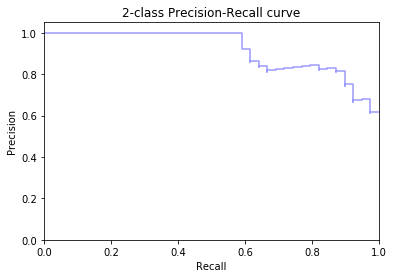

In [84]:
#thresholding

p_sl = rfc.predict_proba(X_test_rfc)
precision, recall, thresholds = precision_recall_curve(y_test, p_sl[:,1])
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.7490571570402496
Max F1-score at cut-off :  0.8536585365853658


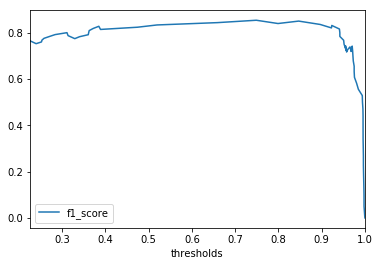

In [85]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())

thresh = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

scrs.plot(x='thresholds', y='f1_score')

In [86]:
frame =  scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]
frame

,precision,recal,thresholds,f1_score
20,0.813953,0.897436,0.749057,0.853659


In [87]:
rfc_thresh = frame['thresholds'].values[0]
rfc_thresh

0.7490571570402496

In [88]:
rfc_thresh_pred_Xtest = [1 if y>=rfc_thresh else 0 for y in p_sl[:, 1]]

f1_score(y_test, rfc_thresh_pred_Xtest)

0.8536585365853658

In [89]:
Counter(rfc_thresh_pred_Xtest)

Counter({0: 19090, 1: 43})

In [90]:
Counter([1 if y>=rfc_thresh else 0 for y in rfc.predict_proba(test_data_rfc)[:, 1]])

Counter({0: 44955, 1: 64})

In [91]:
#--------------------------final thresholding solution for RFC--------------------------------

final_thresh_rfc_predictions = [1 if y>=rfc_thresh else 0 for y in rfc.predict_proba(test_data_rfc)[:, 1]]


rfc_final_thresh_submission = pd.DataFrame(
    {'TransactionId' : testId[0], 'FraudResult' : final_thresh_rfc_predictions}
)

rfc_final_thresh_submission.to_csv('rfc_final_thresh_submission.csv', index=False)

<h3>Drifting</h3>

In [28]:
training = train_data.copy()
testing = test_data.copy()

training['origin'] = 1
testing['origin'] = 0

training.drop('FraudResult', axis=1, inplace=True)

training = training.sample(30000, random_state=42)
testing = testing.sample(15000, random_state=112)

combined = pd.concat([training, testing], axis=0)
y = combined['origin']
X = combined.drop('origin', axis=1)

rfc_drift_list = []

model = RandomForestClassifier(
    max_depth=4, max_features=0.78, n_jobs=-1, random_state=23, class_weight={0:1, 1:14.4}
)

for i in X.columns:
    score = cross_val_score(model, pd.DataFrame(X[i]), y, cv=2, scoring='roc_auc', verbose=0).mean()
    
    if score>0.8:
        rfc_drift_list.append(i)
        print(i, score)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

No. Customers per Acc 0.8461761777777778


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

Amount_to_std_ProviderId 0.8124250777777778


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Amount_to_mean_PricingStrategy 0.8291174555555556


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Amount_to_std_PricingStrategy 0.8264664488888889


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

Amount_to_std_ProductCategory 0.8210283244444443


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Amount_to_mean_ChannelId 0.8327858577777778


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Amount_to_std_ChannelId 0.8014915377777777


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

In [29]:
rfc_drift_list

['No. Customers per Acc',
 'Amount_to_std_ProviderId',
 'Amount_to_mean_PricingStrategy',
 'Amount_to_std_PricingStrategy',
 'Amount_to_std_ProductCategory',
 'Amount_to_mean_ChannelId',
 'Amount_to_std_ChannelId']

In [41]:
rfc_selected_features

,Features,Importances
0,Amount,0.361416
117,Amount_to_mean_ChannelId,0.268412
118,Amount_to_std_ChannelId,0.088207
9,max_amt_per_ProviderId_in_last_12hhrs,0.088015
57,max_amt_per_ProductId_in_last_12hhrs,0.087849
4,Days_to_Nearest_Holiday,0.032233
110,Amount_to_std_CustomerId,0.006955
112,Amount_to_std_ProviderId,0.006322
8,sum_of_amt_per_ProviderId_in_last_12hhrs,0.005912
184,Week_fourth_week,0.004532


<h2>Decision Tree</h2>

In [18]:
f1 = []

for train, test in TimeSeriesSplit(n_splits=5).split(X_train, y_train):
    # concatenate our training data back together
    X = pd.concat([X_train.iloc[train], y_train.iloc[train]], axis=1)

    # separate minority and majority classes
    not_fraud = X[X.FraudResult==0]
    fraud = X[X.FraudResult==1]

    # upsample minority
    fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

    # combine majority and upsampled minority
    upsampled = pd.concat([not_fraud, fraud_upsampled])

    # check new class counts
    upsampled.FraudResult.value_counts()

    y_train_upsampled = upsampled.FraudResult
    X_train_upsampled = upsampled.drop('FraudResult', axis=1)
    
    dtree = DecisionTreeClassifier(max_depth=4, max_features=0.4, random_state=42, class_weight='balanced')
    dtree.fit(X_train_upsampled, y_train_upsampled)
    f1.append(f1_score(y_train.iloc[test], dtree.predict(X_train.iloc[test])))
    
np.mean(f1)

0.3492133307599553

In [19]:
f1 = []

for train, test in TimeSeriesSplit(n_splits=5).split(X_train, y_train):
    # concatenate our training data back together
    X = pd.concat([X_train.iloc[train], y_train.iloc[train]], axis=1)

    # separate minority and majority classes
    not_fraud = X[X.FraudResult==0]
    fraud = X[X.FraudResult==1]

    # downsample majority
    not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

    # combine minority and downsampled majority
    downsampled = pd.concat([not_fraud_downsampled, fraud])

    # checking counts
    downsampled.FraudResult.value_counts()

    y_train_downsampled = downsampled.FraudResult
    X_train_downsampled = downsampled.drop('FraudResult', axis=1)
    
    dtree = DecisionTreeClassifier(max_depth=4, max_features=0.4, random_state=42, class_weight='balanced')
    dtree.fit(X_train_downsampled, y_train_downsampled)
    f1.append(f1_score(y_train.iloc[test], dtree.predict(X_train.iloc[test])))
    
np.mean(f1)

0.16745709177965104

In [20]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=42, max_features=0.6, class_weight={1:100})
cross_val_score(dtree, X_train, y_train, cv=TimeSeriesSplit(n_splits=5), scoring='f1').mean()

0.5332214688053476

In [21]:
params = {
    'class_weight' : [{0:1, 1:w} for w in [14.1, 14.2, 14.3, 14.4, 14.5]]
}


grid4 = GridSearchCV(DecisionTreeClassifier(
    max_depth=4, max_features=0.7, random_state=42, class_weight={0:1, 1:100}
), params, scoring='f1', n_jobs=-1, cv=TimeSeriesSplit(n_splits=5))

grid4.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 100}, criterion='gini',
            max_depth=4, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'class_weight': [{0: 1, 1: 14.1}, {0: 1, 1: 14.2}, {0: 1, 1: 14.3}, {0: 1, 1: 14.4}, {0: 1, 1: 14.5}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [23]:
grid4.best_params_, grid4.best_score_

({'class_weight': {0: 1, 1: 14.3}}, 0.777639507578453)

In [24]:
params1 = {
    'max_depth' : [3, 4, 5, 6, 7, 8]
}


grid4 = GridSearchCV(DecisionTreeClassifier(
    max_depth=4, max_features=0.7, random_state=42, class_weight={0:1, 1:14.3}
), params1, scoring='f1', n_jobs=-1, cv=TimeSeriesSplit(n_splits=5))

grid4.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 14.3}, criterion='gini',
            max_depth=4, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [25]:
grid4.best_params_, grid4.best_score_

({'max_depth': 5}, 0.8218006897454254)

In [61]:
params1 = {
    'min_samples_leaf' : np.linspace(0.000001, 0.00004, 50, endpoint=True)
}


grid4 = GridSearchCV(DecisionTreeClassifier(
    max_depth=5, max_features=0.5, random_state=42, class_weight={0:1, 1:14.3}
), params1, scoring='f1', n_jobs=-1, cv=TimeSeriesSplit(n_splits=5))

grid4.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 14.3}, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': array([1.00000e-06, 1.79592e-06, 2.59184e-06, 3.38776e-06, 4.18367e-06,
       4.97959e-06, 5.77551e-06, 6.57143e-06, 7.36735e-06, 8.16327e-06,
       8.95918e-06, 9.75510e-06, 1.05510e-05, 1.13469e-05, 1.21429e-05,
       1.29388e-05, 1.37347e-05, 1.45306e-05, 1.5326... 3.52245e-05, 3.60204e-05,
       3.68163e-05, 3.76122e-05, 3.84082e-05, 3.92041e-05, 4.00000e-05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score

In [62]:
grid4.best_params_, grid4.best_score_

({'min_samples_leaf': 2.6469387755102045e-05}, 0.8576742725299601)

In [63]:
grid4.best_estimator_

DecisionTreeClassifier(class_weight={0: 1, 1: 14.3}, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2.6469387755102045e-05, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [64]:
dtree_ft_importances = grid4.best_estimator_.feature_importances_
fts = X_train.columns

dtree_importances = pd.DataFrame({'Features' : fts, 'Importances' : dtree_ft_importances}).sort_values(by='Importances', ascending=False)
dtree_importances.head()

,Features,Importances
0,Amount,0.870249
184,Week_fourth_week,0.045016
65,max_amt_per_ProductId_in_last_72hhrs,0.027265
7,Avg_amt_per_ProviderId_in_last_12hhrs,0.022816
167,Month_January,0.015760


In [65]:
dtree_importances[dtree_importances['Importances']==0].shape

(180, 2)

In [66]:
dtree_importances = dtree_importances[dtree_importances['Importances']>0]
dtree_importances.head()

,Features,Importances
0,Amount,0.870249
184,Week_fourth_week,0.045016
65,max_amt_per_ProductId_in_last_72hhrs,0.027265
7,Avg_amt_per_ProviderId_in_last_12hhrs,0.022816
167,Month_January,0.015760


In [67]:
grid4 = grid4.best_estimator_

In [49]:
thresholds = np.sort(np.array(dtree_importances['Importances']))
for thresh in thresholds:
    
    f1 = []
    
    for train, test in TimeSeriesSplit(n_splits=10).split(X_train, y_train):
        # select features using threshold
        selection = SelectFromModel(grid4, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train.iloc[train])
        # train model
        selection_model = DecisionTreeClassifier(**grid4.get_params())
        selection_model.fit(select_X_train, y_train.iloc[train])
        # eval model
        select_X_test = selection.transform(X_train.iloc[test])
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        f1.append(f1_score(y_train.iloc[test], predictions))
        
    print("Thresh=%.8f, n=%d, F1: %.8f" % (thresh, select_X_train.shape[1], np.mean(f1)))

Thresh=0.00000622, n=11, F1: 0.74273951
Thresh=0.00000959, n=10, F1: 0.77214143
Thresh=0.00057593, n=9, F1: 0.75920246
Thresh=0.00366536, n=8, F1: 0.81533834
Thresh=0.00622593, n=7, F1: 0.71701733
Thresh=0.00841075, n=6, F1: 0.78077687
Thresh=0.01576015, n=5, F1: 0.71461630
Thresh=0.02281637, n=4, F1: 0.75453477
Thresh=0.02726465, n=3, F1: 0.68504648
Thresh=0.04501588, n=2, F1: 0.71387361
Thresh=0.87024917, n=1, F1: 0.61448513


In [68]:
dtree_selected_features = dtree_importances[dtree_importances['Importances']>=0.00366536]
dtree_selected_features

,Features,Importances
0,Amount,0.870249
184,Week_fourth_week,0.045016
65,max_amt_per_ProductId_in_last_72hhrs,0.027265
7,Avg_amt_per_ProviderId_in_last_12hhrs,0.022816
167,Month_January,0.015760
57,max_amt_per_ProductId_in_last_12hhrs,0.008411
100,sum_of_amt_per_CustomerId_in_last_168hhrs,0.006226
120,Amount_to_std_ProductId,0.003665


In [69]:
X_train_dtree = X_train.loc[:, dtree_selected_features['Features']]
X_test_dtree = X_test.loc[:, dtree_selected_features['Features']]

test_data_dtree = test_data.loc[:, dtree_selected_features['Features']]

In [70]:
grid4

DecisionTreeClassifier(class_weight={0: 1, 1: 14.3}, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2.6469387755102045e-05, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [71]:
dtree = DecisionTreeClassifier(
    max_depth=5, max_features=0.5, class_weight={0:1, 1:14.3},
    min_samples_leaf=2.6469387755102045e-05, random_state=42
)

dtree.fit(X_train_dtree, y_train, )

DecisionTreeClassifier(class_weight={0: 1, 1: 14.3}, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2.6469387755102045e-05, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [57]:
train_predictions = dtree.predict(X_train_dtree)
test_predictions = dtree.predict(X_test_dtree)

print('Train Score: {:4f}'.format(f1_score(y_train, train_predictions)))
print('Test Score: {:4f}'.format(f1_score(y_test, test_predictions)))

Train Score: 0.846797
Test Score: 0.795699


In [58]:
Counter(test_predictions)

Counter({0: 19079, 1: 54})

In [59]:
Counter(dtree.predict(test_data_dtree))

Counter({0: 44949, 1: 70})

In [60]:
confusion_matrix(y_test, test_predictions)

array([[19077,    17],
       [    2,    37]], dtype=int64)

In [63]:
cross_val_score(dtree, X_train_dtree, y_train, cv=TimeSeriesSplit(n_splits=5), n_jobs=-1, scoring='f1').mean()

0.8248092280390418

In [64]:
cross_val_score(dtree, X_train_dtree, y_train, cv=StratifiedKFold(n_splits=5, random_state=42), n_jobs=-1, scoring='f1').mean()

0.8354513781826615

In [62]:
#----------------------------------final solution for dtree--------------------------------

final_dtree_predictions = dtree.predict(test_data_dtree)


dtree_final_submission = pd.DataFrame(
    {'TransactionId' : testId[0], 'FraudResult' : final_dtree_predictions}
)

dtree_final_submission.to_csv('dtree_final_submission.csv', index=False)

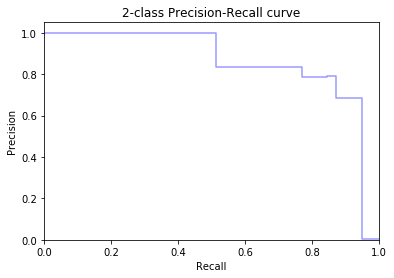

In [65]:
#thresholding

p_sl = dtree.predict_proba(X_test_dtree)
precision, recall, thresholds = precision_recall_curve(y_test, p_sl[:,1])
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.8773006134969326
Max F1-score at cut-off :  0.8292682926829267


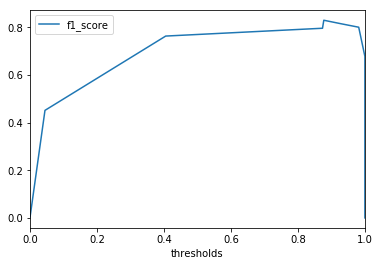

In [66]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())

thresh = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

scrs.plot(x='thresholds', y='f1_score')

In [67]:
frame =  scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]
frame

,precision,recal,thresholds,f1_score
4,0.790698,0.871795,0.877301,0.829268


In [68]:
dtree_thresh = frame['thresholds'].values[0]
dtree_thresh

0.8773006134969326

In [69]:
dtree_thresh_pred_Xtest = [1 if y>=dtree_thresh else 0 for y in p_sl[:, 1]]

f1_score(y_test, dtree_thresh_pred_Xtest)

0.8292682926829267

In [70]:
Counter(dtree_thresh_pred_Xtest)

Counter({0: 19090, 1: 43})

In [71]:
Counter([1 if y>=dtree_thresh else 0 for y in dtree.predict_proba(test_data_dtree)[:, 1]])

Counter({0: 44949, 1: 70})

In [72]:
precision_score(y_test, dtree_thresh_pred_Xtest)

0.7906976744186046

In [73]:
recall_score(y_test, dtree_thresh_pred_Xtest)

0.8717948717948718

In [74]:
confusion_matrix(y_test, dtree_thresh_pred_Xtest)

array([[19085,     9],
       [    5,    34]], dtype=int64)

In [75]:
#--------------------------final thresholding solution for DTREE--------------------------------

final_thresh_dtree_predictions = [1 if y>=dtree_thresh else 0 for y in dtree.predict_proba(test_data_dtree)[:, 1]]


dtree_final_thresh_submission = pd.DataFrame(
    {'TransactionId' : testId[0], 'FraudResult' : final_thresh_dtree_predictions}
)

dtree_final_thresh_submission.to_csv('dtree_final_thresh_submission.csv', index=False)

<h3>Drifting</h3>

In [51]:
training = train_data.copy()
testing = test_data.copy()

training['origin'] = 1
testing['origin'] = 0

training.drop('FraudResult', axis=1, inplace=True)

training = training.sample(30000, random_state=42)
testing = testing.sample(15000, random_state=112)

combined = pd.concat([training, testing], axis=0)
y = combined['origin']
X = combined.drop('origin', axis=1)

dtree_drift_list = []

model = DecisionTreeClassifier(
    max_depth=4, max_features=0.78, random_state=23, class_weight={0:1, 1:14.4}
)

for i in X.columns:
    score = cross_val_score(model, pd.DataFrame(X[i]), y, cv=2, scoring='roc_auc', verbose=0).mean()
    
    if score>0.8:
        dtree_drift_list.append(i)
        print(i, score)

No. Customers per Acc 0.8427610666666667
Amount_to_std_PricingStrategy 0.8227109177777778
Amount_to_mean_ChannelId 0.8297594066666667


<h2>ETC</h2>

In [100]:
etc = ExtraTreesClassifier(
    n_estimators=100, max_depth=4, max_features=0.7, n_jobs=-1,
    random_state=42, class_weight={0:1, 1:100}
)

cross_val_score(etc, X_train, y_train, cv=TimeSeriesSplit(n_splits=5), scoring='f1', n_jobs=-1).mean()

0.5666991679332641

In [101]:
etc.fit(X_train, y_train)

pred1 = etc.predict(X_train)
pred2 = etc.predict(X_test)
print(f1_score(y_test, pred2))
print(f1_score(y_train, pred1))

0.5342465753424658
0.579047619047619


In [104]:
params = {
    'class_weight' : [{0:1, 1:w} for w in [14.1, 14.2, 14.3, 14.4, 14.5]]
}


grid5 = GridSearchCV(ExtraTreesClassifier(
    n_estimators=10, max_depth=4, class_weight={0:1, 1:100}, 
    max_features=0.7, random_state=42, n_jobs=-1
), params, scoring='f1', n_jobs=-1, cv=TimeSeriesSplit(n_splits=5))

grid5.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight={0: 1, 1: 100},
           criterion='gini', max_depth=4, max_features=0.7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'class_weight': [{0: 1, 1: 14.1}, {0: 1, 1: 14.2}, {0: 1, 1: 14.3}, {0: 1, 1: 14.4}, {0: 1, 1: 14.5}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [105]:
grid5.best_params_, grid5.best_score_

({'class_weight': {0: 1, 1: 14.3}}, 0.7671160113393064)

In [72]:
params1 = {
    'min_samples_leaf' : np.linspace(0.00000001, 0.00000005, 5)
}


grid5 = GridSearchCV(ExtraTreesClassifier(
    n_estimators=10, max_depth=6, class_weight={0:1, 1:14.3}, 
    max_features=0.7, random_state=42, n_jobs=-1
), params1, scoring='f1', n_jobs=-1, cv=TimeSeriesSplit(n_splits=5))

grid5.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight={0: 1, 1: 14.3},
           criterion='gini', max_depth=6, max_features=0.7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': array([1.e-08, 2.e-08, 3.e-08, 4.e-08, 5.e-08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [73]:
grid5.best_params_, grid5.best_score_

({'min_samples_leaf': 1e-08}, 0.8100935089754966)

In [74]:
grid5.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight={0: 1, 1: 14.3},
           criterion='gini', max_depth=6, max_features=0.7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1e-08,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [75]:
etc_ft_importances = grid5.best_estimator_.feature_importances_
fts = X_train.columns

etc_importances = pd.DataFrame({'Features' : fts, 'Importances' : etc_ft_importances}).sort_values(by='Importances', ascending=False)
etc_importances.head()

,Features,Importances
15,Avg_amt_per_ProviderId_in_last_72hhrs,0.086361
7,Avg_amt_per_ProviderId_in_last_12hhrs,0.079514
89,max_amt_per_CustomerId_in_last_12hhrs,0.070680
51,Avg_amt_per_ChannelId_in_last_168hhrs,0.067593
35,Avg_amt_per_ProductCategory_in_last_168hhrs,0.063306


In [76]:
etc_importances[etc_importances['Importances']==0].shape

(94, 2)

In [77]:
etc_importances = etc_importances[etc_importances['Importances']>0]
etc_importances.head()

,Features,Importances
15,Avg_amt_per_ProviderId_in_last_72hhrs,0.086361
7,Avg_amt_per_ProviderId_in_last_12hhrs,0.079514
89,max_amt_per_CustomerId_in_last_12hhrs,0.070680
51,Avg_amt_per_ChannelId_in_last_168hhrs,0.067593
35,Avg_amt_per_ProductCategory_in_last_168hhrs,0.063306


In [78]:
grid5 = grid5.best_estimator_

In [125]:
thresholds = np.sort(np.array(etc_importances['Importances']))
for thresh in thresholds:
    
    f1 = []
    
    for train, test in TimeSeriesSplit(n_splits=10).split(X_train, y_train):
        # select features using threshold
        selection = SelectFromModel(grid5, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train.iloc[train])
        # train model
        selection_model = ExtraTreesClassifier(**grid5.get_params())
        selection_model.fit(select_X_train, y_train.iloc[train])
        # eval model
        select_X_test = selection.transform(X_train.iloc[test])
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        f1.append(f1_score(y_train.iloc[test], predictions))
        
    print("Thresh=%.8f, n=%d, F1: %.8f" % (thresh, select_X_train.shape[1], np.mean(f1)))

Thresh=0.00000066, n=97, F1: 0.79098105
Thresh=0.00001079, n=96, F1: 0.80334655
Thresh=0.00003466, n=95, F1: 0.79859306
Thresh=0.00004727, n=94, F1: 0.79969955
Thresh=0.00004755, n=93, F1: 0.77758763
Thresh=0.00004783, n=92, F1: 0.78378083
Thresh=0.00006025, n=91, F1: 0.76304749
Thresh=0.00008013, n=90, F1: 0.78745745
Thresh=0.00008556, n=89, F1: 0.77793616
Thresh=0.00009203, n=88, F1: 0.78453389
Thresh=0.00009264, n=87, F1: 0.79116897
Thresh=0.00009422, n=86, F1: 0.78265230
Thresh=0.00009492, n=85, F1: 0.77627425
Thresh=0.00015251, n=84, F1: 0.76658539
Thresh=0.00017495, n=83, F1: 0.80340120
Thresh=0.00018378, n=82, F1: 0.77591713
Thresh=0.00019067, n=81, F1: 0.77185389
Thresh=0.00022579, n=80, F1: 0.78714747
Thresh=0.00023059, n=79, F1: 0.78641996
Thresh=0.00025858, n=78, F1: 0.77244254
Thresh=0.00027108, n=77, F1: 0.79350088
Thresh=0.00028242, n=76, F1: 0.79511681
Thresh=0.00031040, n=75, F1: 0.78657041
Thresh=0.00031067, n=74, F1: 0.79196364
Thresh=0.00034120, n=73, F1: 0.78558568


In [79]:
etc_selected_features = etc_importances[etc_importances['Importances']>0.00078879]
etc_selected_features.head()

,Features,Importances
15,Avg_amt_per_ProviderId_in_last_72hhrs,0.086361
7,Avg_amt_per_ProviderId_in_last_12hhrs,0.079514
89,max_amt_per_CustomerId_in_last_12hhrs,0.070680
51,Avg_amt_per_ChannelId_in_last_168hhrs,0.067593
35,Avg_amt_per_ProductCategory_in_last_168hhrs,0.063306


In [80]:
X_train_etc = X_train.loc[:, etc_selected_features['Features']]
X_test_etc = X_test.loc[:, etc_selected_features['Features']]

test_data_etc = test_data.loc[:, etc_selected_features['Features']]

In [81]:
grid5

ExtraTreesClassifier(bootstrap=False, class_weight={0: 1, 1: 14.3},
           criterion='gini', max_depth=6, max_features=0.7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1e-08,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [82]:
etc = ExtraTreesClassifier(
    n_estimators=8000, max_depth=6, max_features=0.7, class_weight={0:1, 1:14.3},
    n_jobs=-1, random_state=42
)

etc.fit(X_train_etc, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight={0: 1, 1: 14.3},
           criterion='gini', max_depth=6, max_features=0.7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=8000, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [141]:
train_predictions = etc.predict(X_train_etc)
test_predictions = etc.predict(X_test_etc)

print('Train Score: {:4f}'.format(f1_score(y_train, train_predictions)))
print('Test Score: {:4f}'.format(f1_score(y_test, test_predictions)))

Train Score: 0.861190
Test Score: 0.770833


In [142]:
Counter(test_predictions)

Counter({0: 19076, 1: 57})

In [143]:
Counter(etc.predict(test_data_etc))

Counter({0: 44894, 1: 125})

In [144]:
confusion_matrix(y_test, test_predictions)

array([[19074,    20],
       [    2,    37]], dtype=int64)

In [145]:
#----------------------------------final solution for etc--------------------------------

final_etc_predictions = etc.predict(test_data_etc)


etc_final_submission = pd.DataFrame(
    {'TransactionId' : testId[0], 'FraudResult' : final_etc_predictions}
)

etc_final_submission.to_csv('etc_final_submission.csv', index=False)

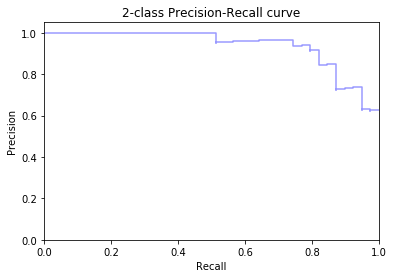

In [25]:
#thresholding

p_sl = etc.predict_proba(X_test_etc)
precision, recall, thresholds = precision_recall_curve(y_test, p_sl[:,1])
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.8903699490040615
Max F1-score at cut-off :  0.8648648648648648


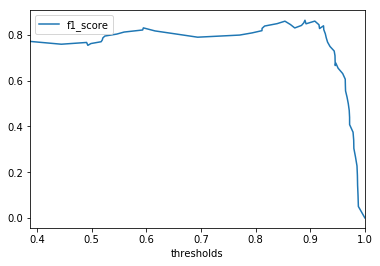

In [26]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())

thresh = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

scrs.plot(x='thresholds', y='f1_score')

In [27]:
frame =  scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]
frame

,precision,recal,thresholds,f1_score
27,0.914286,0.820513,0.89037,0.864865


In [28]:
etc_thresh = frame['thresholds'].values[0]
etc_thresh

0.8903699490040615

In [150]:
etc_thresh_pred_Xtest = [1 if y>=etc_thresh else 0 for y in p_sl[:, 1]]

f1_score(y_test, etc_thresh_pred_Xtest)

0.8648648648648648

In [151]:
Counter(etc_thresh_pred_Xtest)

Counter({0: 19098, 1: 35})

In [152]:
Counter([1 if y>=etc_thresh else 0 for y in etc.predict_proba(test_data_etc)[:, 1]])

Counter({0: 44961, 1: 58})

In [153]:
precision_score(y_test, etc_thresh_pred_Xtest)

0.9142857142857143

In [154]:
recall_score(y_test, etc_thresh_pred_Xtest)

0.8205128205128205

In [155]:
confusion_matrix(y_test, etc_thresh_pred_Xtest)

array([[19091,     3],
       [    7,    32]], dtype=int64)

In [29]:
#--------------------------final thresholding solution for ETC--------------------------------

final_thresh_etc_predictions = [1 if y>=etc_thresh else 0 for y in etc.predict_proba(test_data_etc)[:, 1]]


etc_final_thresh_submission = pd.DataFrame(
    {'TransactionId' : testId[0], 'FraudResult' : final_thresh_etc_predictions}
)

etc_final_thresh_submission.to_csv('etc_final_thresh_submission.csv', index=False)

<h3>Drifting</h3>

In [126]:
training = train_data.copy()
testing = test_data.copy()

training['origin'] = 1
testing['origin'] = 0

training.drop('FraudResult', axis=1, inplace=True)

training = training.sample(30000, random_state=42)
testing = testing.sample(15000, random_state=112)

combined = pd.concat([training, testing], axis=0)
y = combined['origin']
X = combined.drop('origin', axis=1)

etc_drift_list = []

model = ExtraTreesClassifier(
    max_depth=4, max_features=0.78, random_state=23, class_weight={0:1, 1:14.4}
)

for i in X.columns:
    score = cross_val_score(model, pd.DataFrame(X[i]), y, cv=2, scoring='roc_auc', verbose=0).mean()
    
    if score>0.8:
        etc_drift_list.append(i)
        print(i, score)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

No. Customers per Acc 0.8646109577777777


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

In [128]:
etc_drift_list

['No. Customers per Acc']

<h3>--------------Ensembling!</h3>

In [85]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('xgbm', xgbm),
    ('lgbm', lgbm),
    ('rfc', rfc),
    ('dtree', dtree),
    ('etc',etc),
    ], voting='soft', weights=[3, 3, 3, 2, 1.6], n_jobs=-1)

#voting_classifier.fit(X_train, y_train)

In [86]:
X_train.head()

,Amount,PricingStrategy,No. Customers per Acc,ExtraCharges,Days_to_Nearest_Holiday,Prev_Amt,Time_since_last_trans,Avg_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProviderId_in_last_12hhrs,max_amt_per_ProviderId_in_last_12hhrs,...,Multiple_Sub_by_Customer_Yes,Multiple_Sub_by_Acc_Yes,Week_first_week,Week_fourth_week,Week_second_week,Week_third_week,Within_CI95_7days_Yes,Within_CI95_14days_Yes,Within_CI95_21days_Yes,Within_CI95_28days_Yes
46767,9000.0,3,1070,0.0,2,9000.0,1.200000,10125.000000,40500.0,19500.0,...,1,0,0,0,0,0,0,0,0,0
6158,15000.0,3,70,1650.0,32,-644.0,3.650000,14000.000000,28000.0,15000.0,...,1,0,0,1,0,0,0,0,0,0
80336,-5000.0,3,30893,0.0,15,10000.0,2.450000,-5000.000000,-5000.0,-5000.0,...,1,1,1,0,0,0,1,0,0,1
22537,200.0,4,31,0.0,15,-200.0,1320.716667,200.000000,200.0,200.0,...,1,0,0,0,1,0,0,0,0,0
86131,2000.0,3,155,0.0,11,-50.0,55.900000,1532.923077,19928.0,2688.0,...,1,0,1,0,0,0,0,0,0,0


In [99]:
test_data.columns[:121]

Index(['Amount', 'PricingStrategy', 'No. Customers per Acc', 'ExtraCharges',
       'Days_to_Nearest_Holiday', 'Prev_Amt', 'Time_since_last_trans',
       'Avg_amt_per_ProviderId_in_last_12hhrs',
       'sum_of_amt_per_ProviderId_in_last_12hhrs',
       'max_amt_per_ProviderId_in_last_12hhrs',
       ...
       'Amount_to_mean_ProviderId', 'Amount_to_std_ProviderId',
       'Amount_to_mean_PricingStrategy', 'Amount_to_std_PricingStrategy',
       'Amount_to_mean_ProductCategory', 'Amount_to_std_ProductCategory',
       'Amount_to_mean_ChannelId', 'Amount_to_std_ChannelId',
       'Amount_to_mean_ProductId', 'Amount_to_std_ProductId'],
      dtype='object', length=121)

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
numeric_data_columns = X_train.columns[:121]

In [104]:
scaler = StandardScaler()

X_train.loc[:, numeric_data_columns] = scaler.fit_transform(X_train.loc[:, numeric_data_columns])
X_test.loc[:, numeric_data_columns] = scaler.transform(X_test.loc[:, numeric_data_columns])

test_data.loc[:, numeric_data_columns] = scaler.transform(test_data.loc[:, numeric_data_columns])

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.

In [105]:
X_train.head()

,Amount,PricingStrategy,No. Customers per Acc,ExtraCharges,Days_to_Nearest_Holiday,Prev_Amt,Time_since_last_trans,Avg_amt_per_ProviderId_in_last_12hhrs,sum_of_amt_per_ProviderId_in_last_12hhrs,max_amt_per_ProviderId_in_last_12hhrs,...,Multiple_Sub_by_Customer_Yes,Multiple_Sub_by_Acc_Yes,Week_first_week,Week_fourth_week,Week_second_week,Week_third_week,Within_CI95_7days_Yes,Within_CI95_14days_Yes,Within_CI95_21days_Yes,Within_CI95_28days_Yes
46767,0.022511,-0.282873,-0.649232,-0.087028,-1.144950,0.028395,-0.233128,0.037747,0.185925,0.037604,...,1,0,0,0,0,0,0,0,0,0
6158,0.075012,-0.282873,-0.719364,3.375378,1.900247,-0.062568,-0.232598,0.078004,0.183861,0.011319,...,1,0,0,1,0,0,0,0,0,0
80336,-0.099991,-0.282873,1.442321,-0.087028,0.174635,0.037827,-0.232858,-0.119384,0.178413,-0.105504,...,1,1,1,0,0,0,1,0,0,1
22537,-0.054490,2.182728,-0.722099,-0.087028,0.174635,-0.058380,0.052455,-0.065362,0.179272,-0.075130,...,1,0,0,0,1,0,0,0,0,0
86131,-0.038740,-0.282873,-0.713403,-0.087028,-0.231391,-0.056965,-0.221289,-0.051515,0.182529,-0.060597,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
for i in [5, 10, 15, 20]:
    select_feature = SelectKBest(f_classif, k=i).fit(X_train, y_train)
    x_train_2 = select_feature.transform(X_train)
    x_test_2 = select_feature.transform(X_test)
    #clf = VotingClassifier()
    clf = voting_classifier.fit(x_train_2,y_train)
    print(f1_score(y_test, clf.predict(x_test_2)))

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [133 134 142 143 156 163 168 179] are constant.
  UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.06684256816182936


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [133 134 142 143 156 163 168 179] are constant.
  UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.06985294117647059


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [133 134 142 143 156 163 168 179] are constant.
  UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.07607607607607605


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [133 134 142 143 156 163 168 179] are constant.
  UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [83]:
def get_models():
    """Generate a library of base learners."""

    models = {'lgb': lgbm,
              'xgb': xgbm,
              'dtree' : dtree,
              'etc' : etc
              }

    return models

In [84]:
base_learners = get_models()
meta_learner = rfc

In [85]:
from mlens.ensemble import SuperLearner

[MLENS] backend: threading
[MLENS] Found 1 residual cache(s):
        1 (4096): C:\Users\USER\AppData\Local\Temp\.mlens_tmp_cache_m_k3esbc
        Total size: 4096
[MLENS] Removing... done.


In [90]:
def scoring(actual, pred):
    return f1_score(actual, pred)

In [86]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=5,
    random_state=42,
    verbose=0,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True)
sl.add_meta(meta_learner, proba=True)

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=0)

In [103]:
select_feature = SelectKBest(f_classif, k=25).fit(X_train, y_train)
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)


test_data_2 = select_feature.transform(test_data)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [133 134 142 143 156 163 168 179] are constant.
  UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [88]:

sl = sl.fit(x_train_2,y_train)


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [91]:

p_sl = sl.predict_proba(x_test_2)
pred = [1 if y>=0.5 else 0 for y in p_sl[:, 1]]

print("Super Learner f1 score: {}".format(f1_score(y_test, pred)))

Super Learner f1 score: 0.7777777777777778


In [92]:
precision, recall, thresholds = precision_recall_curve(y_test, p_sl[:,1])

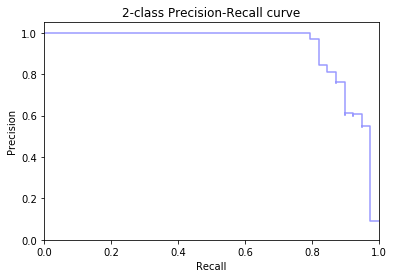

In [93]:
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.9091913104057312
Max F1-score at cut-off :  0.8888888888888888


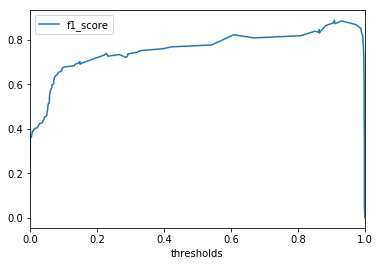

In [94]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())

thresh = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

scrs.plot(x='thresholds', y='f1_score')

In [95]:
scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]

,precision,recal,thresholds,f1_score
162,0.969697,0.820513,0.909191,0.888889


In [99]:
frame =  scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]
frame

,precision,recal,thresholds,f1_score
162,0.969697,0.820513,0.909191,0.888889


In [100]:
thresh = frame['thresholds'].values[0]
thresh

0.9091913104057312

In [101]:
pred = [1 if y>=thresh else 0 for y in p_sl[:, 1]]

f1_score(y_test, pred)

0.8888888888888888

In [117]:
test_data_probs_no_thresh = sl.predict_proba(test_data_2)
test_data_pred_no_thresh = [1 if y>=0.5 else 0 for y in test_data_probs[:, 1]]

submission = pd.DataFrame({'TransactionId' : testId[0], 'FraudResult' : test_data_pred_no_thresh})
submission.to_csv('stacked_no_thresh_sub.csv', index=False)

In [105]:
test_data_probs = sl.predict_proba(test_data_2)
test_data_pred = [1 if y>=thresh else 0 for y in test_data_probs[:, 1]]

submission = pd.DataFrame({'TransactionId' : testId[0], 'FraudResult' : test_data_pred})
submission.to_csv('stacked_sub.csv', index=False)

<h4>combine</h4>

In [111]:
xgbm.predict_proba(X_test_xgb)

array([[0.98934525, 0.01065473],
       [0.98934525, 0.01065473],
       [0.98934525, 0.01065473],
       ...,
       [0.98934525, 0.01065473],
       [0.98934525, 0.01065473],
       [0.98934525, 0.01065473]], dtype=float32)

In [112]:
probs = 0.25*xgbm.predict_proba(X_test_xgb) + 0.25*lgbm.predict_proba(X_test_lgbm) + 0.25*rfc.predict_proba(X_test_rfc) + 0.13*dtree.predict_proba(X_test_dtree) + 0.12*etc.predict_proba(X_test_etc)
probs

array([[0.99732562, 0.00267438],
       [0.99732446, 0.00267553],
       [0.99732381, 0.00267618],
       ...,
       [0.9973193 , 0.0026807 ],
       [0.99731907, 0.00268092],
       [0.99729149, 0.0027085 ]])

In [115]:
f1_score(y_test, [1 if y>=0.5 else 0 for y in probs[:, 1]])

0.8705882352941177

In [116]:
test_probs = 0.25*xgbm.predict_proba(test_data_xgb) + 0.25*lgbm.predict_proba(test_data_lgbm) + 0.25*rfc.predict_proba(test_data_rfc) + 0.13*dtree.predict_proba(test_data_dtree) + 0.12*etc.predict_proba(test_data_etc)
test_probs

array([[0.99726322, 0.00273677],
       [0.99726327, 0.00273673],
       [0.99726306, 0.00273693],
       ...,
       [0.99727305, 0.00272694],
       [0.99731139, 0.0026886 ],
       [0.99732484, 0.00267515]])

In [119]:

test_data_pred_no_thresh = [1 if y>=0.5 else 0 for y in test_probs[:, 1]]

submission = pd.DataFrame({'TransactionId' : testId[0], 'FraudResult' : test_data_pred_no_thresh})
submission.to_csv('combine_no_thresh_sub.csv', index=False)

In [120]:
#thresh combine!

In [122]:
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1])

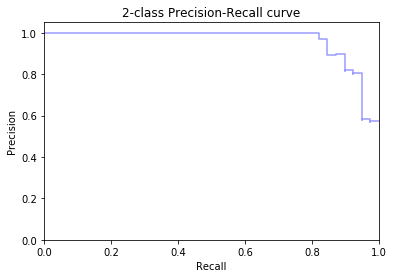

In [123]:
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.9370986071528116
Max F1-score at cut-off :  0.9041095890410958


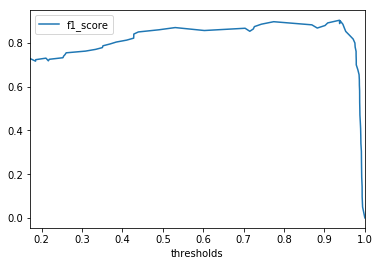

In [124]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())

thresh = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

scrs.plot(x='thresholds', y='f1_score')

In [125]:
frame =  scrs.loc[scrs['f1_score'] == scrs.f1_score.max()]
frame

,precision,recal,thresholds,f1_score
34,0.970588,0.846154,0.937099,0.90411


In [126]:
thresh = frame['thresholds'].values[0]
thresh

0.9370986071528116

In [127]:

test_data_pred_with_thresh = [1 if y>=thresh else 0 for y in test_probs[:, 1]]

submission = pd.DataFrame({'TransactionId' : testId[0], 'FraudResult' : test_data_pred_with_thresh})
submission.to_csv('combine_with_thresh_sub.csv', index=False)